In [1]:
# 비지도 학습
# 과일 분류

In [20]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 데이터 불러오기
fruits = np.load(r'.\data\fruits_300.npy')

In [14]:
# 데이터 확인 형태확인
# 샘플, 이미지 높이, 이미지 너비
fruits.shape

(300, 100, 100)

In [15]:
# 첫 번째 이미지의, 첫 번째 행, 전체 (맨 위 가로줄)
fruits[0, 0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

In [16]:
# 첫 번째 이미지의, 첫 번째 열, 전체 (첫 세로줄)
fruits[0, :, 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 2, 3, 1, 2, 3,
       1, 1, 1, 2, 2, 2, 5, 2, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [17]:
# 첫 번째 이미지의, 전체
fruits[0, :, :]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

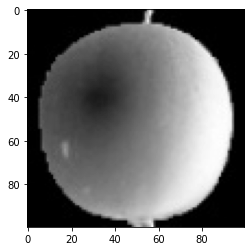

In [23]:
# 이미지 픽셀 넘파이 배열을 이미지로 그리기
plt.imshow(fruits[0], cmap='gray')  # 흑백이미지이므로 cmap 매개변수로 gray 설정
plt.show()

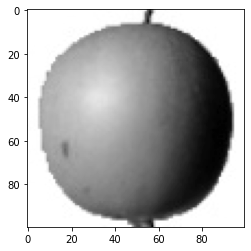

In [34]:
# 이미지 값 처리를 알맞게 할 수 있도록 흑백을 반전
# 배경(검은색:255)이 아닌, *관심대상*의 값이 중요하기 때문에 
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

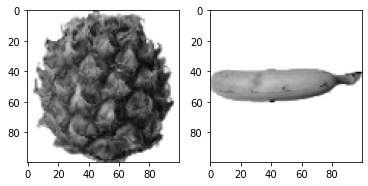

In [31]:
# 100번과 200번의 과일 이미지 출력
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [41]:
# 픽셀 값 분석
# 사용하기 쉽도록 각 과일 데이터 나누기
# 2차원 데이터 값을 1차원으로
# 세로-가로 모양을 가로 1줄로 이어 붙이기

apple = fruits[:100].reshape(-1, 100*100)
print(apple.shape)
pineapple = fruits[100:200].reshape(-1, 100*100)
print(pineapple.shape)
banana = fruits[200:].reshape(-1, 100*100)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [47]:
apple[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [52]:
# apple 데이터 샘플의 픽셀 평균값 확인
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

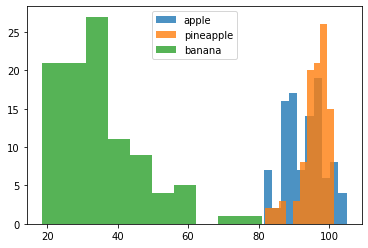

In [58]:
# 히스토그램 시각화
# 히스토그램은 구간별로 값이 발생한 빈도를 나타내는 그래프

# import matplotlib.pyplot as plt

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

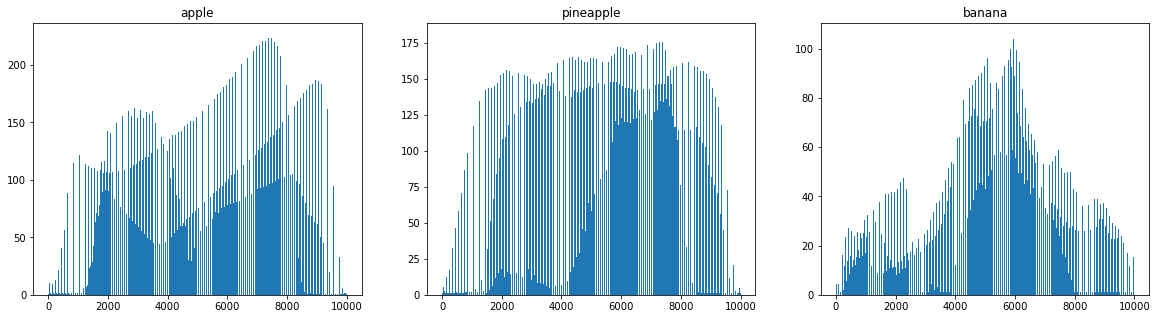

In [59]:
# 전체 샘플의 각 픽셀의 평균을 계산

# import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].set_title('apple')
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].set_title('pineapple')
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].set_title('banana')
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

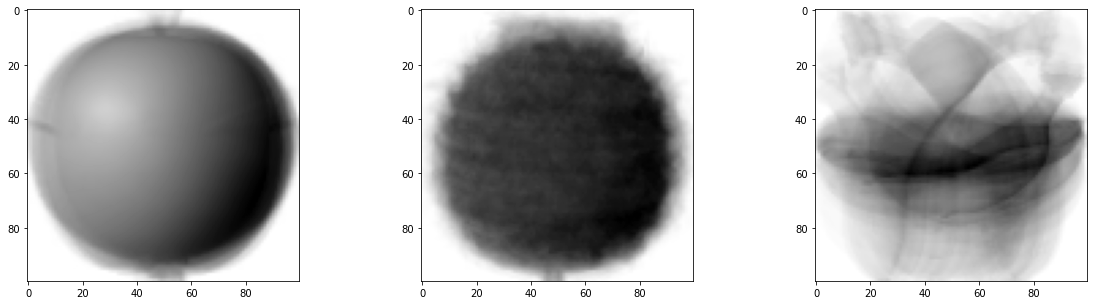

In [63]:
# 픽셀 평균값을 100x100크기로 변경하여 이미지처럼 출력하여 그래프와 비교
# 각 과일의 모든 이미지를 합쳐놓은 개념 (평균적인 모습으로 대표 이미지라 할 수 있음)

# 평균계산
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

# 서브플롯 생성
fig, axs = plt.subplots(1, 3, figsize=(20,5))

# 이미지 표시
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

# 그래프 출력
plt.show()

In [64]:
# 평균값과 가까운 사진 고르기
# 절대값 = np.abs()
abs_diff = np.abs(fruits - apple_mean)
abs_diff

array([[[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       ...,

       [[0.01, 0.01, 0.0

In [65]:
# 절대값의 평균 구하기
abs_mean = np.mean(abs_diff, axis=(1,2))  # axis축. 면(0), 행(1), 열(2)
abs_mean

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [66]:
# 결과 배열의 크기 확인
abs_mean.shape

(300,)

In [67]:
for i in range(10):
    for j in range(10):
        print(i, j, i*10+j)

0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
0 5 5
0 6 6
0 7 7
0 8 8
0 9 9
1 0 10
1 1 11
1 2 12
1 3 13
1 4 14
1 5 15
1 6 16
1 7 17
1 8 18
1 9 19
2 0 20
2 1 21
2 2 22
2 3 23
2 4 24
2 5 25
2 6 26
2 7 27
2 8 28
2 9 29
3 0 30
3 1 31
3 2 32
3 3 33
3 4 34
3 5 35
3 6 36
3 7 37
3 8 38
3 9 39
4 0 40
4 1 41
4 2 42
4 3 43
4 4 44
4 5 45
4 6 46
4 7 47
4 8 48
4 9 49
5 0 50
5 1 51
5 2 52
5 3 53
5 4 54
5 5 55
5 6 56
5 7 57
5 8 58
5 9 59
6 0 60
6 1 61
6 2 62
6 3 63
6 4 64
6 5 65
6 6 66
6 7 67
6 8 68
6 9 69
7 0 70
7 1 71
7 2 72
7 3 73
7 4 74
7 5 75
7 6 76
7 7 77
7 8 78
7 9 79
8 0 80
8 1 81
8 2 82
8 3 83
8 4 84
8 5 85
8 6 86
8 7 87
8 8 88
8 9 89
9 0 90
9 1 91
9 2 92
9 3 93
9 4 94
9 5 95
9 6 96
9 7 97
9 8 98
9 9 99


In [69]:
# 절대값 평균을 가장 작은 순서대로 100개를 가져옴(apple_mean과 오차가 가장 작은 샘플 100개를 고르는 것)

# abs_mean에서 오름차순으로 나열한 abs_mean인덱스를 반환
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

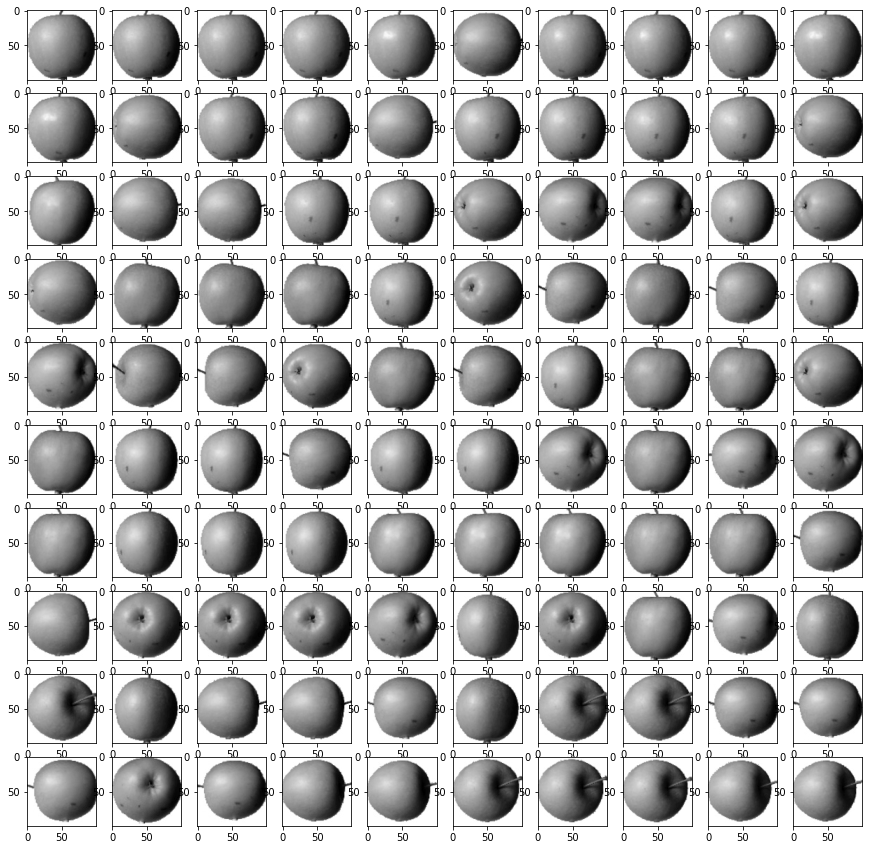

In [72]:
# 선택된 사과 인덱스에 해당하는 샘플을 10x10 격자로 그래프 그리기

# 10 x 10 형태의 서브플롯
fig, axs = plt.subplots(10, 10, figsize=(15,15))

# 서브플롯 각각 위치에, 사과인덱스 순서로 그리기
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap='gray_r')

plt.show()

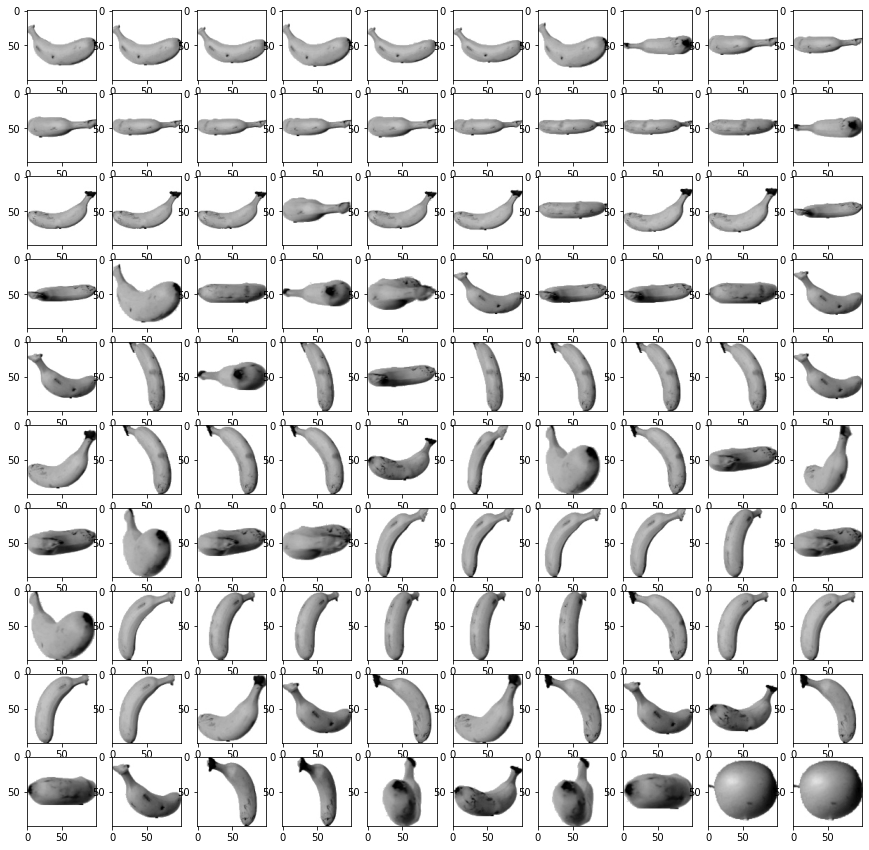

In [77]:
# 바나나 그리기
banana_abs_diff = np.abs(fruits - banana_mean)  # 절대값
banana_abs_mean = np.mean(banana_abs_diff, axis=(1,2))  #평균

banana_index = np.argsort(banana_abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(15,15))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        # axs[i, j].axis('off')  # 그래프의 네모틀 없음

plt.show()

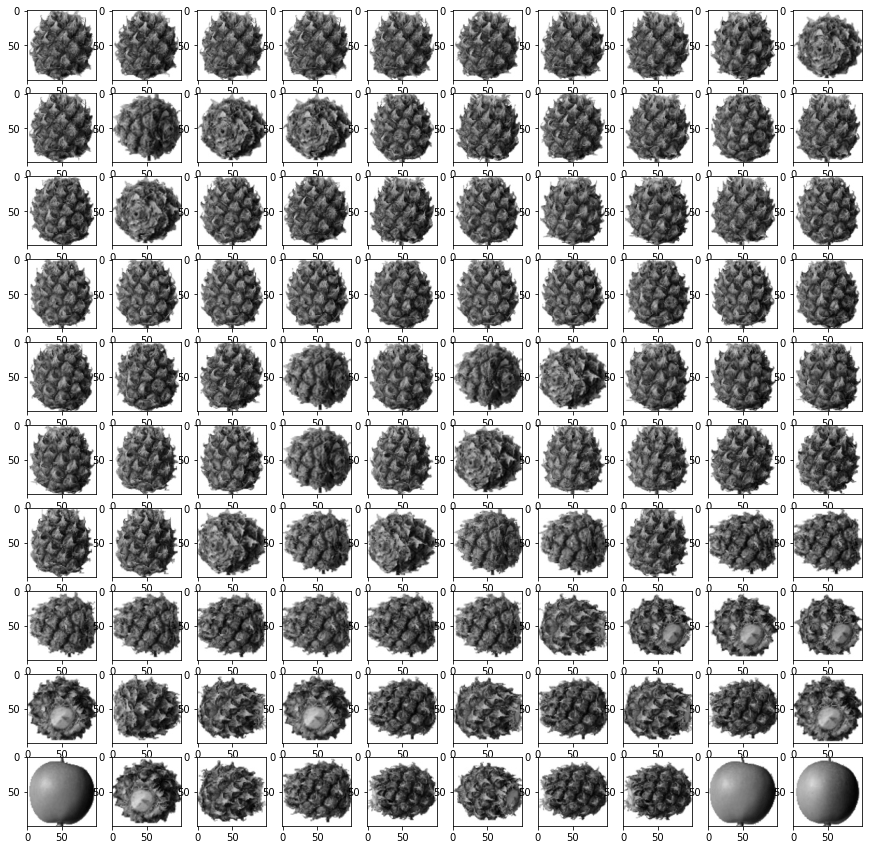

In [89]:
# 파인애플 그리기

pine_abs_diff = np.abs(fruits - pineapple_mean)
pine_abs_mean = np.mean(pine_abs_diff, axis=(1,2))
# print(pine_abs_mean)
# print(pine_abs_mean.shape)

pineapple_index = np.argsort(pine_abs_mean)[:100]
# print(pineapple_index)

fig, axs = plt.subplots(10, 10, figsize=(15,15))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pineapple_index[i * 10 + j]], cmap='gray_r')

plt.show()

### K-means

In [90]:
# import numpy as np
# fruits = np.load(r'/data/fruits_300.npy')

# (샘플수, 너비, 높이) 3차원 배열을 (샘플수, 너비x높이) 배열로 변환
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [92]:
# Kmeans 모델사용
from sklearn.cluster import KMeans

# k-means객체 생성(클러스터 수 3 설정)
km = KMeans(n_clusters=3)

# 학습하기
km.fit(fruits_2d)

KMeans(n_clusters=3)

In [93]:
# 레이블 확인
km.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
# 레이블 별 갯수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 98, 111,  91], dtype=int64))

In [112]:
# 이미지 출력을 위한 함수 정의

def draw_fruits(arr, ratio=1):
    n = len(arr)  # n은 샘플 개수

    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))

    # # 행이 1개면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 +j < n:  # n개까지만 그린다.
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
                axs[i, j].axis('off')
    plt.show()

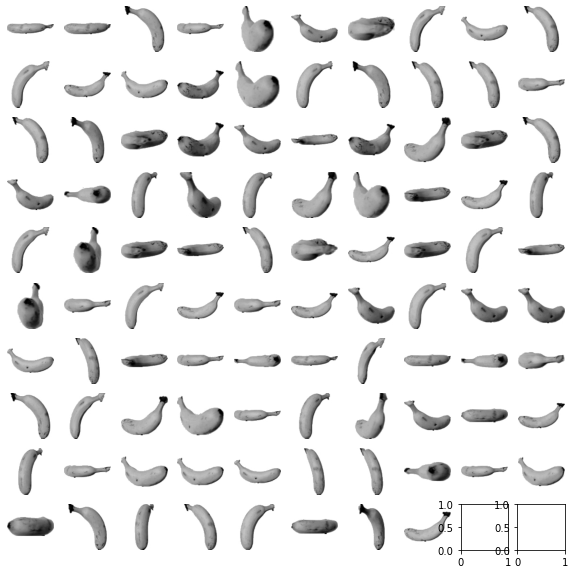

In [113]:
draw_fruits(fruits[km.labels_ == 0])

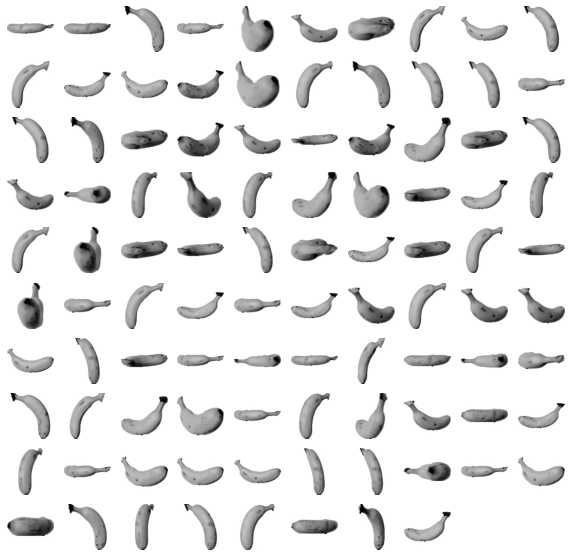

In [115]:
def draw_fruits(arr, ratio=1):
    n = len(arr)  # n은 샘플 개수

    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n / 10))

    # 행이 1개면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows == 1 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

    for i in range(n):
        row = i // 10
        col = i % 10
        axs[row, col].imshow(arr[i], cmap='gray_r')
        axs[row, col].axis('off')

    # 나머지 서브플롯의 축을 끈다
    for i in range(n, rows * cols):
        row = i // 10
        col = i % 10
        axs[row, col].axis('off')

    plt.show()

# 예시 데이터
draw_fruits(fruits[km.labels_ == 0])

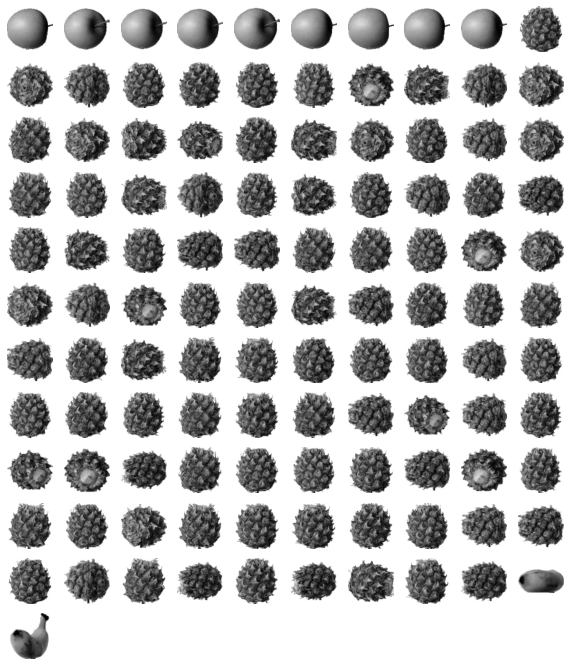

In [116]:
draw_fruits(fruits[km.labels_ == 1])

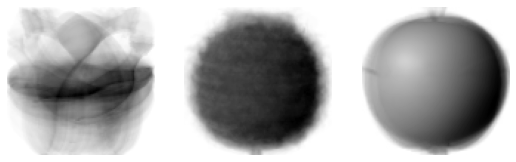

In [119]:
# 2차원 배열로 변환하여 이미지 중심을 출력
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [120]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform() 사용
km.transform(fruits_2d)[100:101]

array([[8837.37750892, 3393.8136117 , 5267.70439881]])

In [121]:
# 예측하기
km.predict(fruits_2d[100:101])

array([1])

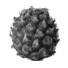

In [123]:
# 예측한 샘플 이미지로 확인
draw_fruits(fruits[100:101])